In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import desc
from sqlalchemy import and_
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(measurements).order_by(desc('date')).first()
most_recent_date=most_recent.date
print(most_recent.date)



2017-08-23


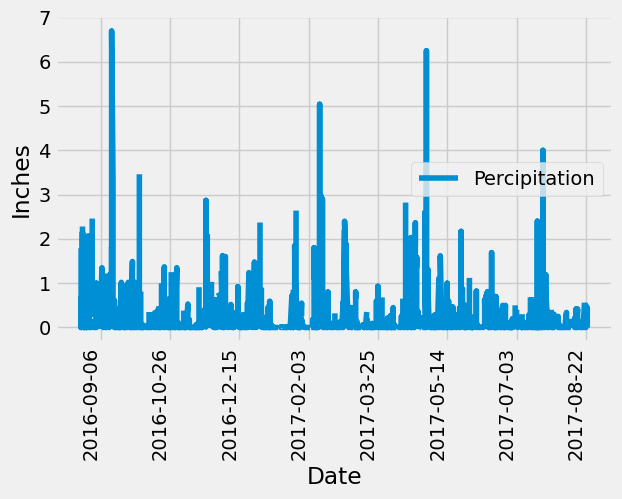

In [10]:



# Calculate the date one year from the last date in data set.

dates = most_recent_date.split("-")
nyear=int(dates[0])
year_min_one=nyear-1
twelve_m_date=str(year_min_one)+"-"+dates[1]+"-"+dates[2]
loop_date=[]
dt_date=[]
loop_pcrp=[]
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
for row in session.query(measurements).order_by(desc('date')).filter(measurements.date <=most_recent_date ).filter(measurements.date >= twelve_m_date).all():




    
# Perform a query to retrieve the data and precipitation scores
    loop_date.append(row.date)
    loop_pcrp.append(row.prcp)
    #datetime_object = dt.strptime(row.date, '%m/%d/%y')
# Save the query results as a Pandas DataFrame. Explicitly set the column names
for row in loop_date:
    dt_date.append(dt.datetime.strptime(row, '%Y-%m-%d'))
df = pd.DataFrame(list(zip(loop_date,loop_pcrp)),columns=['Date','Percipitation'])
df.Date = pd.to_datetime(df['Date'])
myplt=df.set_index('Date').plot()
plt.ylabel('Inches')
plt.xticks(rotation='vertical')
myplt.xaxis.set_major_locator(plt.MaxNLocator(9))
myplt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()
# Sort the dataframe by date
#ALREADY DONE BY FOR LOOP ORDER_BY

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
percip_count = len(df.index)
percip_mean = df['Percipitation'].mean()
percip_std = df['Percipitation'].std()
percip_min = df['Percipitation'].min()
percip_max = df['Percipitation'].max()


panda_list= [percip_count,percip_mean,percip_std,percip_min,percip_max]
panda_index = ['count','mean','std','min','max']
stats_summary = pd.DataFrame(panda_list,index=panda_index)
    #'count':[percip_count],
    #'mean':[percip_mean],
    #'std':[percip_std]
    #'min':[average_math_score],
    #'25%':[average_reading_score],
    #'50%':[passing_math_percentage],
    #'75%':[passing_read_percentage],
    #'max':[overall_passing_rate]

stats_summary

,0
count,2230.000000
mean,0.177279
std,0.461190
min,0.000000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number of stations in the dataset


#station=[]

#for row in session.query(measurements).all():
#    station.append(row.__dict__)
#active_stations= pd.DataFrame(station,columns=['station','date','prcp','tobs'])
#
#nunique = active_stations.nunique()
#print(nunique)

total = session.query(func.count(func.distinct(measurements.station))).scalar()
total


9

In [68]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


active = session.query(measurements.station,func.count(measurements.station) ).order_by(func.count(measurements.station).desc()).group_by(measurements.station).all()


    #station_count.append(row.prcp

active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
top_station=active[0][0]
top_station

'USC00519281'

In [82]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps=session.query(measurements.station,func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).filter(measurements.station==top_station).group_by(measurements.station).all()
temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelveMonths=session.query(measurements.tobs).filter(measurements.station==top_station,measurements.date>=twelve_m_date).all()
twelveMonths

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [88]:
twelvemdf=pd.DataFrame(twelveMonths,columns=['tobs'])
twelvemdf

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 0, 'Temperature')

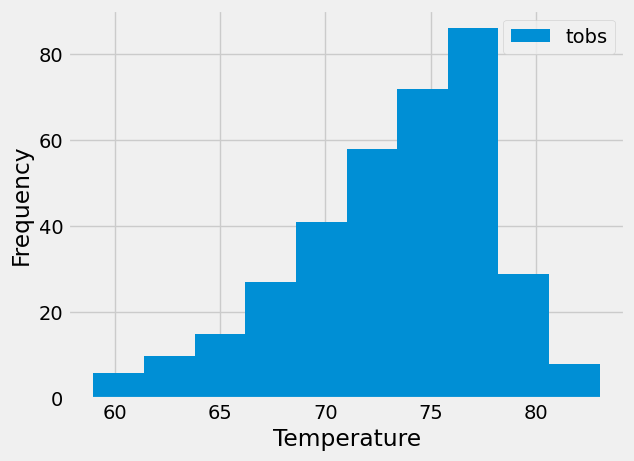

In [94]:
twelvemdf.plot.hist(bins=10)
plt.xlabel("Temperature")

# Close Session

In [ ]:
# Close Session
session.close()